<img src="./assets/逻辑回归步骤.png" width="800" />

# 考试成绩预测-逻辑回归实战
**逻辑回归预测**

逻辑回归的基本步骤：
- 1、数据加载
- 2、原始数据分析
- 3、数据处理
- 4、确定回归模型
- 5、结果数据可视化
- 6、模型评估
- 7、模型优化

## 1、数据加载
数据加载处理包括：数据加载与数据处理两部分内容：
- 用 **pandas** 进行数据的加载
- 用 **numpy** **reshape()**等对数据进行处理，以获得正确格式的输入数据

In [1]:
#【数据加载处理】数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('./data/examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 2、原始数据分析
一般我们会对原始数据以及训练结果进行可视化：
- 原始数据可视化：对训练数据的分布、特征进行分析的必要手段，可以根据数据的分布、特征选择最合适的训练模型
- 结果可视化：对训练结果进行可视化，可以评估训练模型的效果，分析并确定后续优化的路径

这里我们使用的是画图神器 —— **matplotlib**

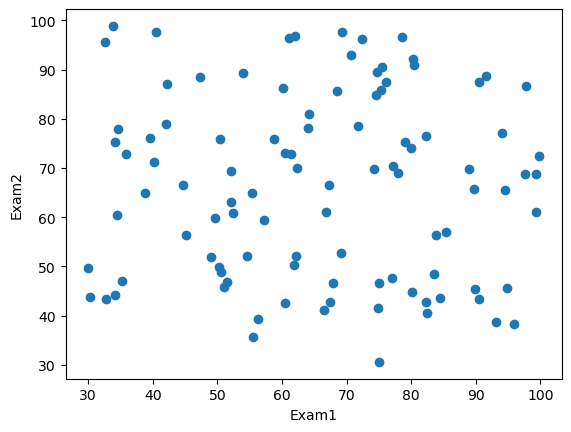

In [3]:
#【数据可视化】原始数据可视化，可先对原始数据进行分析，选用合适的模型进行训练
from matplotlib import pyplot as plt
figure1 = plt.figure()
plt.scatter(data.loc[:, 'Exam1'], data.loc[:, "Exam2"]) # 散点图
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

**数据分类可视化**

在分类问题中，往往都需要对数据进行分类展示，首先我们设定一个判断条件如下 ⬇️

In [ ]:
flag = data.loc[:, 'Pass'] == 1
print(flag)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


接下来，我们重新把散点图画一下吧！

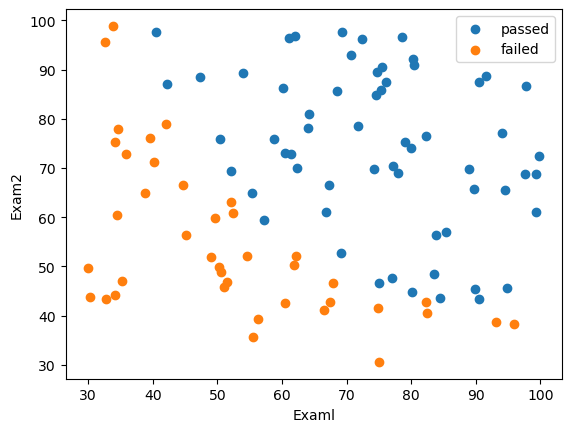

In [ ]:
figure2 = plt.figure()
passed = plt.scatter(data.loc[:, 'Exam1'][flag], data.loc[:, 'Exam2'][flag])
failed = plt.scatter(data.loc[:, 'Exam1'][~flag], data.loc[:, 'Exam2'][~flag])
plt.title = ('Exam1-Exam2')
plt.xlabel('Examl')
plt.ylabel('Exam2')
plt.legend((passed, failed),('passed', 'failed'))
plt.show()

## 3、数据处理

In [ ]:
X = data.drop(['Pass'], axis=1) # 去掉最后一行
y = data.loc[:, 'Pass']

## 4、确定回归模型
本实战项目使用的是线性回归模型，在这里我们采用**sklearn**这个工具库中线性回归模型**LogisticRegression**

In [ ]:
#【确定回归模型】
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X, y)
y_predict = LR.predict(X)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


## 5、结果数据可视化

一般我们会对原始数据以及训练结果进行可视化：
- 原始数据可视化：对训练数据的分布、特征进行分析的必要手段，可以根据数据的分布、特征选择最合适的训练模型
- 结果可视化：对训练结果进行可视化，可以评估训练模型的效果，分析并确定后续优化的路径

这里演示的是把结果进行可视化，先把训练好的参数打印出来看看 ⬇️

In [ ]:
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]
print(theta0, theta1, theta2)

[-25.05219314] 0.20535491217790386 0.20058380395469053


我们知道，$x_1$（Exam1）和$x_2$（Exam2）的关系是：
$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$

显然，$x_2 = \frac{1 - (\theta_0 + \theta_1 x_1)}{\theta_2}$

接下来，在原来散点图的基础上，把边界画出来 ⬇️

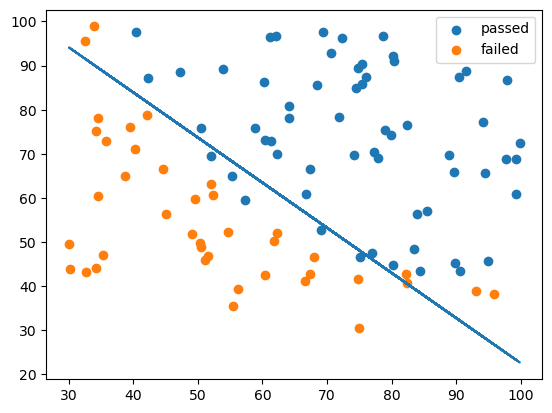

In [ ]:
x1 = data.loc[:, 'Exam1']
x2 = data.loc[:, 'Exam2']
x2_new = -(theta0+theta1*x1)/theta2

fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'Exam1'][flag],data.loc[:,'Exam2'][flag])
failed=plt.scatter(data.loc[:,'Exam1'][~flag],data.loc[:,'Exam2'][~flag])
plt.plot(x1,x2_new)
plt.xlabel = ('Examl')
plt.ylabel = ('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

## 6、模型评估
线性回归一般用的模型评估方法是：准确率，对应**sklearn**中的**accuracy_score**。

准确率计算方法：
$Accuracy = \frac{正确预测的样本数}{总样本数}$

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
accuracy

0.89

从上面可以看到，我们这个训练模型的准确达到0.89。在这里我们用的 $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$ 去拟合。

## 7、模型优化
那么可以用什么方法提高准确率呢？
我们可以用二次的决策边界函数对数据进行分类，这样画出来的就不是直线而是曲线，准确率（肉眼看来）也可能有一定提升。

<img src="./assets/逻辑回归边界函数对比.png" width="600" />

那么如果要用曲线，即二次的边界函数去划分数据，我们需要做哪些改变呢？其实非常简单，只需要把输入数据集重新处理一下即可 ⬇️

<img src="./assets/输入数据集处理对比.png" width="400" />

我们在这里把前面的流程重新走一遍～

### 7.1 数据加载处理

In [ ]:
# ceate new data
x1_2 = x1 * x1
x2_2 = x2 * x2
x1_x2 = x1 * x2

In [ ]:
x_new = {'x1':x1, 'x2':x2, 'x1_2': x1_2, 'x2_2': x2_2, 'x1_x2': x1_x2 }
x_new = pd.DataFrame(x_new)
x_new.head()

,x1,x2,x1_2,x2_2,x1_x2
0,34.623660,78.024693,1198.797805,6087.852690,2701.500406
1,30.286711,43.894998,917.284849,1926.770807,1329.435094
2,35.847409,72.902198,1285.036716,5314.730478,2613.354893
3,60.182599,86.308552,3621.945269,7449.166166,5194.273015
4,79.032736,75.344376,6246.173368,5676.775061,5954.672216


### 7.2 确定回归模型

In [ ]:
# 训练
LR2 = LogisticRegression()
LR2.fit(x_new, y)
y_predict_new = LR2.predict(x_new)

### 7.3 数据可视化

In [ ]:
# 获取训练完的参数
theta0_new = LR2.intercept_
theta1_new, theta2_new, theta3_new, theta4_new, theta5_new = LR2.coef_[0][0], LR2.coef_[0][1], LR2.coef_[0][2], LR2.coef_[0][3], LR2.coef_[0][4]

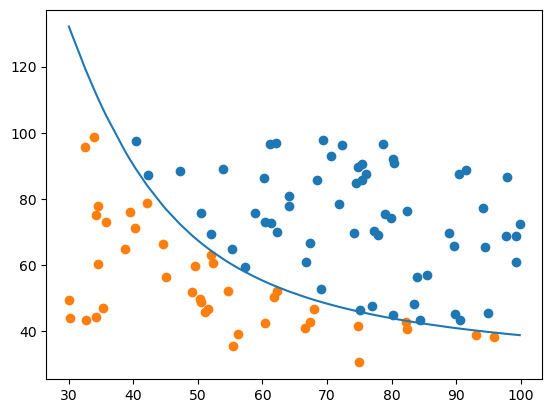

In [ ]:
# 数据可视化
x1_sort = x1.sort_values()
a = theta4_new
b = theta5_new * x1_sort + theta2_new
c = theta0_new + theta1_new * x1_sort + theta3_new*x1_sort * x1_sort
x2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

figure6 = plt.figure()
passed = plt.scatter(data.loc[:, 'Exam1'][flag], data.loc[:, 'Exam2'][flag])
failed = plt.scatter(data.loc[:, 'Exam1'][~flag], data.loc[:, 'Exam2'][~flag])
plt.plot(x1_new, x2_new_boundary)
# plt.title('Exam1', 'Exam2')
plt.show()

### 7.4 模型评估

In [ ]:
# 模型评估
accuracy = accuracy_score(y, y_predict_new)
accuracy

1.0

从上面的图、以及计算的准确率来看，用曲线拟合的结果比直线更佳！